# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [85]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f" There are {len(cities)} cities in this data set")

 There are 603 cities in this data set


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
units = "imperial"
city_temp = ["London", "New York", "Miami", "San Diego", "Sydney"]
for city in city_temp:
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url).json()
    #print(url)

In [76]:
print("Beginning Data Retrieval")
print("----------------------------")
city_data = []
for city in city_temp:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    try:
#         print(response["name"])
        name = response["name"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"] 
        country =  response["sys"]["country"]
        date =  response["dt"]
        
        dict_data = {"City":name, "Latitude":lat, "Longitude":lng, "Max Temp":temp_max, "Humidity":hum, "Cloudiness":cloud, 
                        "Wind Speed":wind, "Country":country, "Date":date}
        city_data.append(dict_data)
        print(f"Procesing Record  of Set  | {name}")
        
    except KeyError:
        print("City Not Found. Skipping...")
        continue
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Procesing Record  of Set  | London
Procesing Record  of Set  | New York
Procesing Record  of Set  | Miami
Procesing Record  of Set  | San Diego
Procesing Record  of Set  | Sydney
----------------------------
Data Retrieval Complete
----------------------------


In [77]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,41.0,90,100,6.22,GB,1607546735
1,New York,40.71,-74.01,35.6,77,90,13.87,US,1607546736
2,Miami,25.77,-80.19,66.0,39,20,6.93,US,1607546745
3,San Diego,32.72,-117.16,69.8,32,75,5.82,US,1607546868
4,Sydney,-33.87,151.21,68.0,72,0,4.70,AU,1607546967


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
#export to csv
city_data_df.to_csv(r"../Output_Data/Cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
#do any cities have over 100% humidity
city_data_df[city_data_df["Humidity"] > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [80]:
#remove cities with over 100% humidity
clean_city_data = city_data_df[(city_data_df["Humidity"] < 100)]
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,41.0,90,100,6.22,GB,1607546735
1,New York,40.71,-74.01,35.6,77,90,13.87,US,1607546736
2,Miami,25.77,-80.19,66.0,39,20,6.93,US,1607546745
3,San Diego,32.72,-117.16,69.8,32,75,5.82,US,1607546868
4,Sydney,-33.87,151.21,68.0,72,0,4.70,AU,1607546967


In [81]:
#  Get the indices of cities that have humidity over 100%.


In [82]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

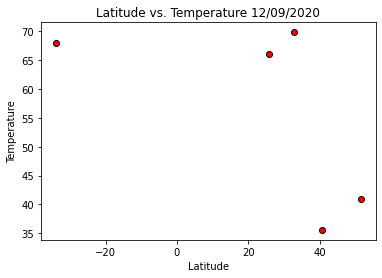

In [83]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Max Temp"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.show()

## Latitude vs. Humidity Plot

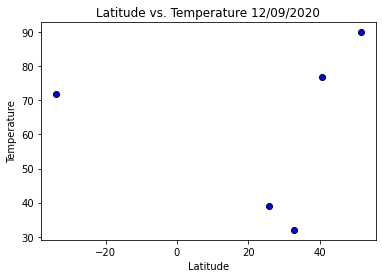

In [84]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.show()

## Latitude vs. Cloudiness Plot

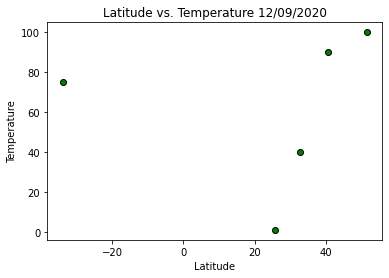

In [52]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloudiness"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.show()

## Latitude vs. Wind Speed Plot

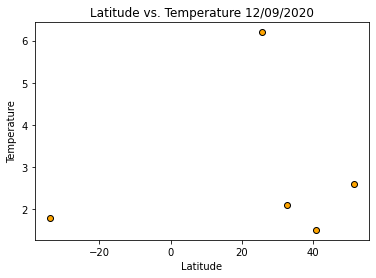

In [53]:
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.show()

## Linear Regression

In [73]:
north_hem = clean_city_data[city_data_df["Latitude"] >= 0]
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,278.15,91,100,2.42,GB,1607545730
1,New York,40.71,-74.01,275.15,77,90,6.20,US,1607545721
2,Miami,25.77,-80.19,292.04,39,20,3.10,US,1607545546
3,San Diego,32.72,-117.16,294.15,32,75,2.60,US,1607545683


In [55]:
south_hem = clean_city_data[city_data_df["Latitude"] < 0]
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Sydney,-33.87,151.21,291.15,77,75,1.78,AU,1607540128


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_axis = north_hem["Latitude"]
y_axis = north_hem["Max Temp"]
plt.title("Northern Hemisphere: Max Temp vs. Latitude 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_axis = south_hem["Latitude"]
y_axis = south_hem["Max Temp"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_axis = north_hem["Latitude"]
y_axis = north_hem["Max Temp"]
plt.title("Latitude vs. Temperature 12/09/2020")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression